In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [18]:
x_data=np.linspace(0.0,100,10000000)
noise= np.random.randn(len(x_data))
noise

array([-0.45612541, -0.90369084,  0.40418368, ...,  1.11358873,
        0.53327714,  0.71967973])

In [19]:
y_true=(0.5*x_data)+5+noise
x_df=pd.DataFrame(data=x_data,columns=['X_data'])
y_df=pd.DataFrame(data=y_true,columns=['Y'])
y_df.head()

,Y
0,4.543875
1,4.096314
2,5.404194
3,5.807714
4,5.183398


In [20]:
my_data=pd.concat([x_df,y_df],axis=1)

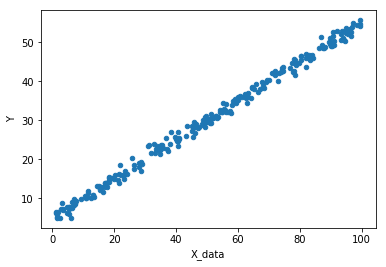

In [21]:
my_data.head()
my_data.sample(n=250).plot(x='X_data',y='Y',kind='scatter')

In [22]:
batch_size=8
print(np.random.random(2))
m=tf.Variable(0.54)
b=tf.Variable(0.66)

[0.75943298 0.85772962]


In [23]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])
y_model=m*xph+b

In [24]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [34]:
init=tf.global_variables_initializer()
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00002)
train=optimizer.minimize(error)

In [35]:
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batch_size):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b=sess.run([m,b])

In [36]:
model_m,model_b

(0.55978674, 0.6634256)

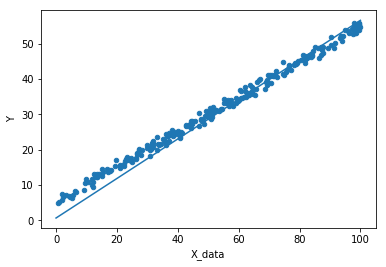

In [37]:
y_hat=x_data*model_m+model_b
my_data.sample(n=250).plot(kind='scatter',x='X_data',y='Y')
plt.plot(x_data,y_hat)

In [39]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpg0uwsris', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x183ca91908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,train_size=0.7,random_state=101)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [42]:
print(x_train.shape)

(7000000,)


In [43]:
x_eval.shape

(3000000,)

In [44]:
input_func= tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [45]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [46]:
eval_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [48]:
estimator.train(input_fn=input_func,steps=1500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpg0uwsris/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1001 into /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpg0uwsris/model.ckpt.
INFO:tensorflow:loss = 9.288537, step = 1001
INFO:tensorflow:global_step/sec: 685.11
INFO:tensorflow:loss = 12.990873, step = 1101 (0.147 sec)
INFO:tensorflow:global_step/sec: 533.092
INFO:tensorflow:loss = 12.58392, step = 1201 (0.188 sec)
INFO:tensorflow:global_step/sec: 858.377
INFO:tensorflow:loss = 17.955185, step = 1301 (0.116 sec)
INFO:tensorflow:global_step/sec: 853.366
INFO:tensorflow:loss = 7.8339806, step = 1401 (0.117 sec)
INFO:tensorflow:global_step/sec: 912.073
INFO:tensorflow:loss = 21.725119, step = 1

In [56]:
train_metrics=estimator.evaluate(input_fn=train_input_func,steps=10000)
eval_metrics=estimator.evaluate(input_fn=eval_input_func,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-02-18:43:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpg0uwsris/model.ckpt-2500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1000/10000]
INFO:tensorflow:Evaluation [2000/10000]
INFO:tensorflow:Evaluation [3000/10000]
INFO:tensorflow:Evaluation [4000/10000]
INFO:tensorflow:Evaluation [5000/10000]
INFO:tensorflow:Evaluation [6000/10000]
INFO:tensorflow:Evaluation [7000/10000]
INFO:tensorflow:Evaluation [8000/10000]
INFO:tensorflow:Evaluation [9000/10000]
INFO:tensorflow:Evaluation [10000/10000]
INFO:tensorflow:Finished evaluation at 2018-04-02-18:43:35
INFO:tensorflow:Saving dict for global step 2500: average_loss = 1.0388775, global_step = 2500, loss = 8.31102
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done cal

In [57]:
train_metrics,eval_metrics

({'average_loss': 1.0388775, 'global_step': 2500, 'loss': 8.31102},
 {'average_loss': 1.0395206, 'global_step': 2500, 'loss': 8.316165})

In [68]:
brand_new_data=np.linspace(0,100,10)
input_fun_pred=tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [69]:
predict_list=list(estimator.predict(input_fun_pred))
predict_val=[x['predictions'] for x in predict_list]
predict_val

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpg0uwsris/model.ckpt-2500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[array([4.597349], dtype=float32),
 array([10.21895], dtype=float32),
 array([15.84055], dtype=float32),
 array([21.46215], dtype=float32),
 array([27.083752], dtype=float32),
 array([32.705353], dtype=float32),
 array([38.32695], dtype=float32),
 array([43.948555], dtype=float32),
 array([49.570152], dtype=float32),
 array([55.191757], dtype=float32)]

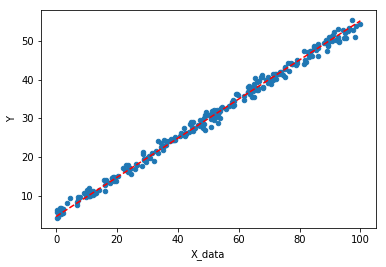

In [70]:
my_data.sample(n=250).plot(kind='scatter',x='X_data',y='Y')
plt.plot(brand_new_data,predict_val,'--r')

In [111]:
from sklearn.datasets import load_wine,load_boston
wine_d=load_wine()
wine_d.data.shape,wine_d.target.shape,wine_d.feature_names
wine_d.target[:10]

boston_d=load_boston()
boston_d_df=pd.DataFrame(boston_d.data)
boston_tar=pd.DataFrame(boston_d.target)

In [98]:
boston_d_df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [104]:
boston_d_df[3].value_counts(),boston_d_df[8].value_counts(),boston_d_df.shape

(0.0    471
 1.0     35
 Name: 3, dtype: int64, 24.0    132
 5.0     115
 4.0     110
 3.0      38
 6.0      26
 8.0      24
 2.0      24
 1.0      20
 7.0      17
 Name: 8, dtype: int64, (506, 13))

#applying tensorflow linearregressor <br>
step1: Preparing feature columns <br>
step2: Preparing estimator function <br>
step3: 

In [120]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[13])]
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmp2v0b42sn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a796e7fd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [125]:
boston_train,boston_test,boston_tar_train,boston_tar_test=train_test_split(boston_d_df.values,boston_tar.values,random_state=200,test_size=0.35)
input_fun=tf.estimator.inputs.numpy_input_fn({'x':boston_train},boston_tar_train,shuffle=True)
train_fun=tf.estimator.inputs.numpy_input_fn({'x':boston_train},boston_tar_train,shuffle=True)
eval_fun=tf.estimator.inputs.numpy_input_fn({'x':boston_test},boston_tar_test,shuffle=True)

In [124]:
boston_train.shape,boston_tar_train.shape

((328, 13), (328, 1))

In [128]:
estimator.train(input_fn=input_fun,steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmp2v0b42sn/model.ckpt-6
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7 into /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmp2v0b42sn/model.ckpt.
INFO:tensorflow:loss = 11997.037, step = 7
INFO:tensorflow:Saving checkpoints for 9 into /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmp2v0b42sn/model.ckpt.
INFO:tensorflow:Loss for final step: 6526.5894.


In [129]:
train_res=estimator.evaluate(input_fn=train_fun)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-02-20:16:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmp2v0b42sn/model.ckpt-9
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-02-20:16:04
INFO:tensorflow:Saving dict for global step 9: average_loss = 80.65759, global_step = 9, loss = 8818.563


In [130]:
eval_res=estimator.evaluate(input_fn=eval_fun)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-02-20:17:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmp2v0b42sn/model.ckpt-9
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-02-20:17:15
INFO:tensorflow:Saving dict for global step 9: average_loss = 103.2633, global_step = 9, loss = 9190.434


In [131]:
train_res,eval_res

({'average_loss': 80.65759, 'global_step': 9, 'loss': 8818.563},
 {'average_loss': 103.2633, 'global_step': 9, 'loss': 9190.434})

In [133]:
estimator.get_variable_names()

['global_step',
 'linear/linear_model/bias_weights',
 'linear/linear_model/bias_weights/part_0/Ftrl',
 'linear/linear_model/bias_weights/part_0/Ftrl_1',
 'linear/linear_model/x/weights',
 'linear/linear_model/x/weights/part_0/Ftrl',
 'linear/linear_model/x/weights/part_0/Ftrl_1']

### Working with classifier dataset

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [136]:
data_set=pd.read_csv("pima-indians-diabetes.csv")

In [141]:
data_set.head(10)

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C
5,5,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,0,A
6,3,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,1,C
7,10,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,0,A
8,2,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,1,D
9,8,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,1,A


In [144]:
list_norm=['Number_pregnant','Glucose_concentration','Blood_pressure','Triceps','Insulin','BMI','Pedigree']
data_set[list_norm]=data_set[list_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()),axis=1)

In [145]:
data_set.head(10)

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.474563,1.000000,0.793531,0.475362,0.000000,0.673299,0.315193,50,1,B
1,0.108734,0.789554,1.000000,0.541475,0.000000,0.732782,0.215472,31,0,C
2,0.511733,1.000000,0.570456,0.000000,0.000000,0.377603,0.275805,32,1,B
3,0.041397,0.813617,1.000000,0.386339,0.145352,0.757038,0.000000,21,0,B
4,0.000000,0.729562,0.347452,0.374651,0.210443,0.680690,1.000000,33,1,C
5,0.484897,0.961021,1.000000,0.000000,0.000000,0.628993,0.086586,30,0,A
6,0.266771,0.820145,0.866051,0.643654,0.080715,1.000000,0.000000,26,1,C
7,1.000000,0.982412,0.000000,0.000000,0.000000,0.894337,0.040649,29,0,A
8,0.087350,1.000000,0.564571,0.439831,0.635793,0.439831,0.000000,53,1,D
9,0.598039,0.798262,1.000000,0.000000,0.000000,0.000000,0.083565,54,1,A


In [156]:
import tensorflow as tf
data_set['Group'].value_counts()

B    196
A    193
D    193
C    186
Name: Group, dtype: int64

In [184]:
# preparing feature column for individual column
num_preg=tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc=tf.feature_column.numeric_column('Glucose_concentration')
dias_press=tf.feature_column.numeric_column('Blood_pressure')
tricep=tf.feature_column.numeric_column('Triceps')
insulin=tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')
ass_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

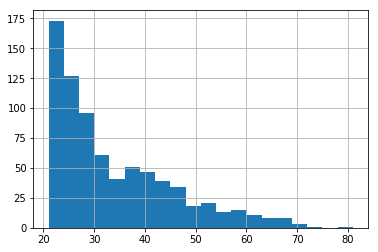

In [179]:
data_set['Age'].hist(bins=20)

In [180]:
age_bucket=tf.feature_column.bucketized_column(age,[20,30,40,50,60,70,80])
feat_cols=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,ass_group,age_bucket]

In [165]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [181]:
X_data=data_set.drop('Class',axis=1)
label=data_set[['Class']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,label,test_size=0.3,random_state=101)

In [183]:
#Input Function
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,num_epochs=200,shuffle=True,batch_size=8)
#Preparing model
estimator=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)
#training the model
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpv4fuvaoh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x182b2afa20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/rk/xb8jhz_541379hrhsnsd7vjm00

In [189]:
eval_train_fun=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,num_epochs=1000,shuffle=False,batch_size=8)
eval_test_fun=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,num_epochs=1000,shuffle=False,batch_size=8)
results_train=estimator.evaluate(eval_train_fun)
results_test=estimator.evaluate(eval_test_fun)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-03-10:03:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpv4fuvaoh/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-03-10:06:31
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7206704, accuracy_baseline = 0.6517691, auc = 0.752246, auc_precision_recall = 0.59416366, average_loss = 0.56063265, global_step = 1000, label/mean = 0.3482309, loss = 4.485061, prediction/mean = 0.3682505
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-03-10:06:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpv4fuvaoh/model.ckpt-1000
INFO:tensorf

In [190]:
results_train,results_test

({'accuracy': 0.7206704,
  'accuracy_baseline': 0.6517691,
  'auc': 0.752246,
  'auc_precision_recall': 0.59416366,
  'average_loss': 0.56063265,
  'global_step': 1000,
  'label/mean': 0.3482309,
  'loss': 4.485061,
  'prediction/mean': 0.3682505},
 {'accuracy': 0.7186147,
  'accuracy_baseline': 0.64935064,
  'auc': 0.75139916,
  'auc_precision_recall': 0.57319367,
  'average_loss': 0.5643229,
  'global_step': 1000,
  'label/mean': 0.35064936,
  'loss': 4.514583,
  'prediction/mean': 0.3836608})

In [230]:
predict_input_fun=tf.estimator.inputs.pandas_input_fn(x=X_test,shuffle=False,num_epochs=100)
predict_dict=estimator.predict(predict_input_fun)
lst_pred=list(predict_dict)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpv4fuvaoh/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [231]:
final_val = [x['class_ids'] for x in lst_pred]
probabilities1=[x['probabilities'][0] for x in lst_pred]

In [239]:
pred_df=pd.DataFrame(data=final_val,columns=['Predict'])
pred_df['Prob']=probabilities1

In [241]:
pred_df.head(10)

,Predict,Prob
0,1,0.372026
1,1,0.424478
2,0,0.583184
3,0,0.647651
4,0,0.851086
5,0,0.591632
6,1,0.395797
7,0,0.587227
8,0,0.795251
9,0,0.743067


In [250]:
group_embedded=tf.feature_column.embedding_column(ass_group,dimension=4)
feat_cols_emb=[num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,group_embedded,age_bucket]
model_dnn=tf.estimator.DNNClassifier(hidden_units=[20,40,40,40,20],feature_columns=feat_cols_emb,n_classes=2)
model_dnn.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpmy1ifm5q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x184a0d94e0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/rk/xb8jhz_541379hrhsnsd7vjm00

In [251]:
eval_train_fun=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,num_epochs=1000,shuffle=False,batch_size=8)
eval_test_fun=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,num_epochs=1000,shuffle=False,batch_size=8)
results_train=model_dnn.evaluate(eval_train_fun)
results_test=model_dnn.evaluate(eval_test_fun)
print(results_train,results_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-03-11:29:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpmy1ifm5q/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-03-11:32:01
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76536316, accuracy_baseline = 0.6517691, auc = 0.8235065, auc_precision_recall = 0.69726765, average_loss = 0.4832989, global_step = 1000, label/mean = 0.3482309, loss = 3.8663912, prediction/mean = 0.34409726
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-03-11:32:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rk/xb8jhz_541379hrhsnsd7vjm0000gp/T/tmpmy1ifm5q/model.ckpt-1000
INFO:tens

In [255]:
model_dnn.get_variable_value('Number_pregnant')

NotFoundError: Key Number_pregnant not found in checkpoint